Accuracy: 1.0
Classification:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Predictions: [0, 0]
Actual: [0, 0]


C:\Users\a\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


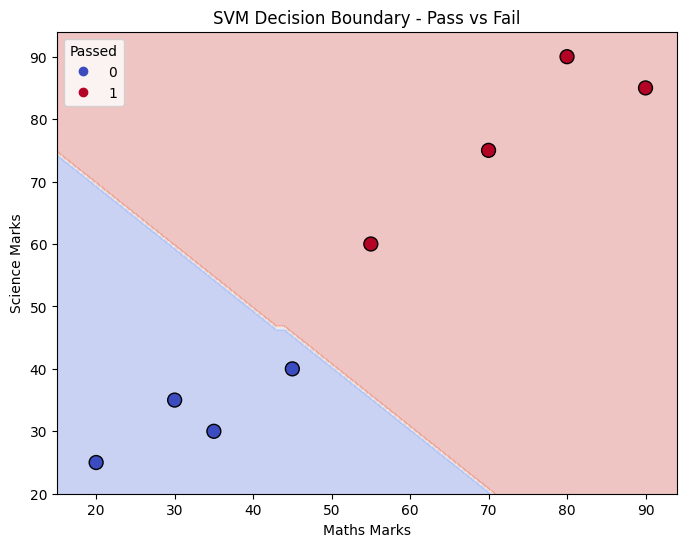

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

data = {
    "Maths": [30, 45, 55, 70, 90, 20, 35, 80],
    "Science": [35, 40, 60, 75, 85, 25, 30, 90],
    "Passed": [0, 0, 1, 1, 1, 0, 0, 1]
}
df = pd.DataFrame(data)

X = df[["Maths", "Science"]]
y = df["Passed"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification:\n", classification_report(y_test, y_pred))
print("Predictions:", y_pred.tolist())
print("Actual:", y_test.tolist())

plt.figure(figsize=(8,6))

x_min, x_max = X["Maths"].min() - 5, X["Maths"].max() + 5
y_min, y_max = X["Science"].min() - 5, X["Science"].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                     np.arange(y_min, y_max, 1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

scatter = plt.scatter(X["Maths"], X["Science"], c=y, s=100, cmap=plt.cm.coolwarm, edgecolors='k')

plt.xlabel("Maths Marks")
plt.ylabel("Science Marks")
plt.title("SVM Decision Boundary - Pass vs Fail")
plt.legend(*scatter.legend_elements(), title="Passed")
plt.show()


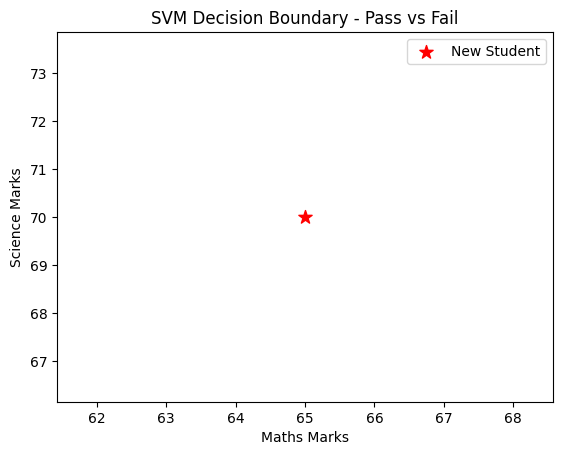

In [10]:
plt.scatter(65, 70, color='red', s=100, marker='*', label="New Student")

plt.xlabel("Maths Marks")
plt.ylabel("Science Marks")
plt.title("SVM Decision Boundary - Pass vs Fail")
plt.legend()
plt.show()